## **Installing YOLOV8**

In [1]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.234 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


Import Dependencies

In [12]:
from ultralytics import YOLO
from IPython.display import Image, display

## **Dataset**



In [4]:
!mkdir Dataset
%cd Dataset

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="{YOUR-API}")
project = rf.workspace("yolo-m191n").project("mushroomdetection-buflq")
dataset = project.version(1).download("yolov8")


/content/Dataset
  Using cached roboflow-1.1.14-py3-none-any.whl (68 kB)
  Using cached certifi-2023.7.22-py3-none-any.whl (158 kB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Using cached opencv_python_headless-4.8.0.74-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (49.1 MB)
  Using cached supervision-0.17.1-py3-none-any.whl (77 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl (54 kB)
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled opencv-python-headless-4.8.1.78
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalli

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.234, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to mushroomDetection-1 in yolov8:: 100%|██████████| 1012/1012 [00:00<00:00, 6186.29it/s]


## **Custom Training**

In [5]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/Dataset/mushroomDetection-1/data.yaml epochs=50 imgsz=800 plots=True

Ultralytics YOLOv8.0.234 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Dataset/mushroomDetection-1/data.yaml, epochs=50, time=None, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

## Confusion Matrix

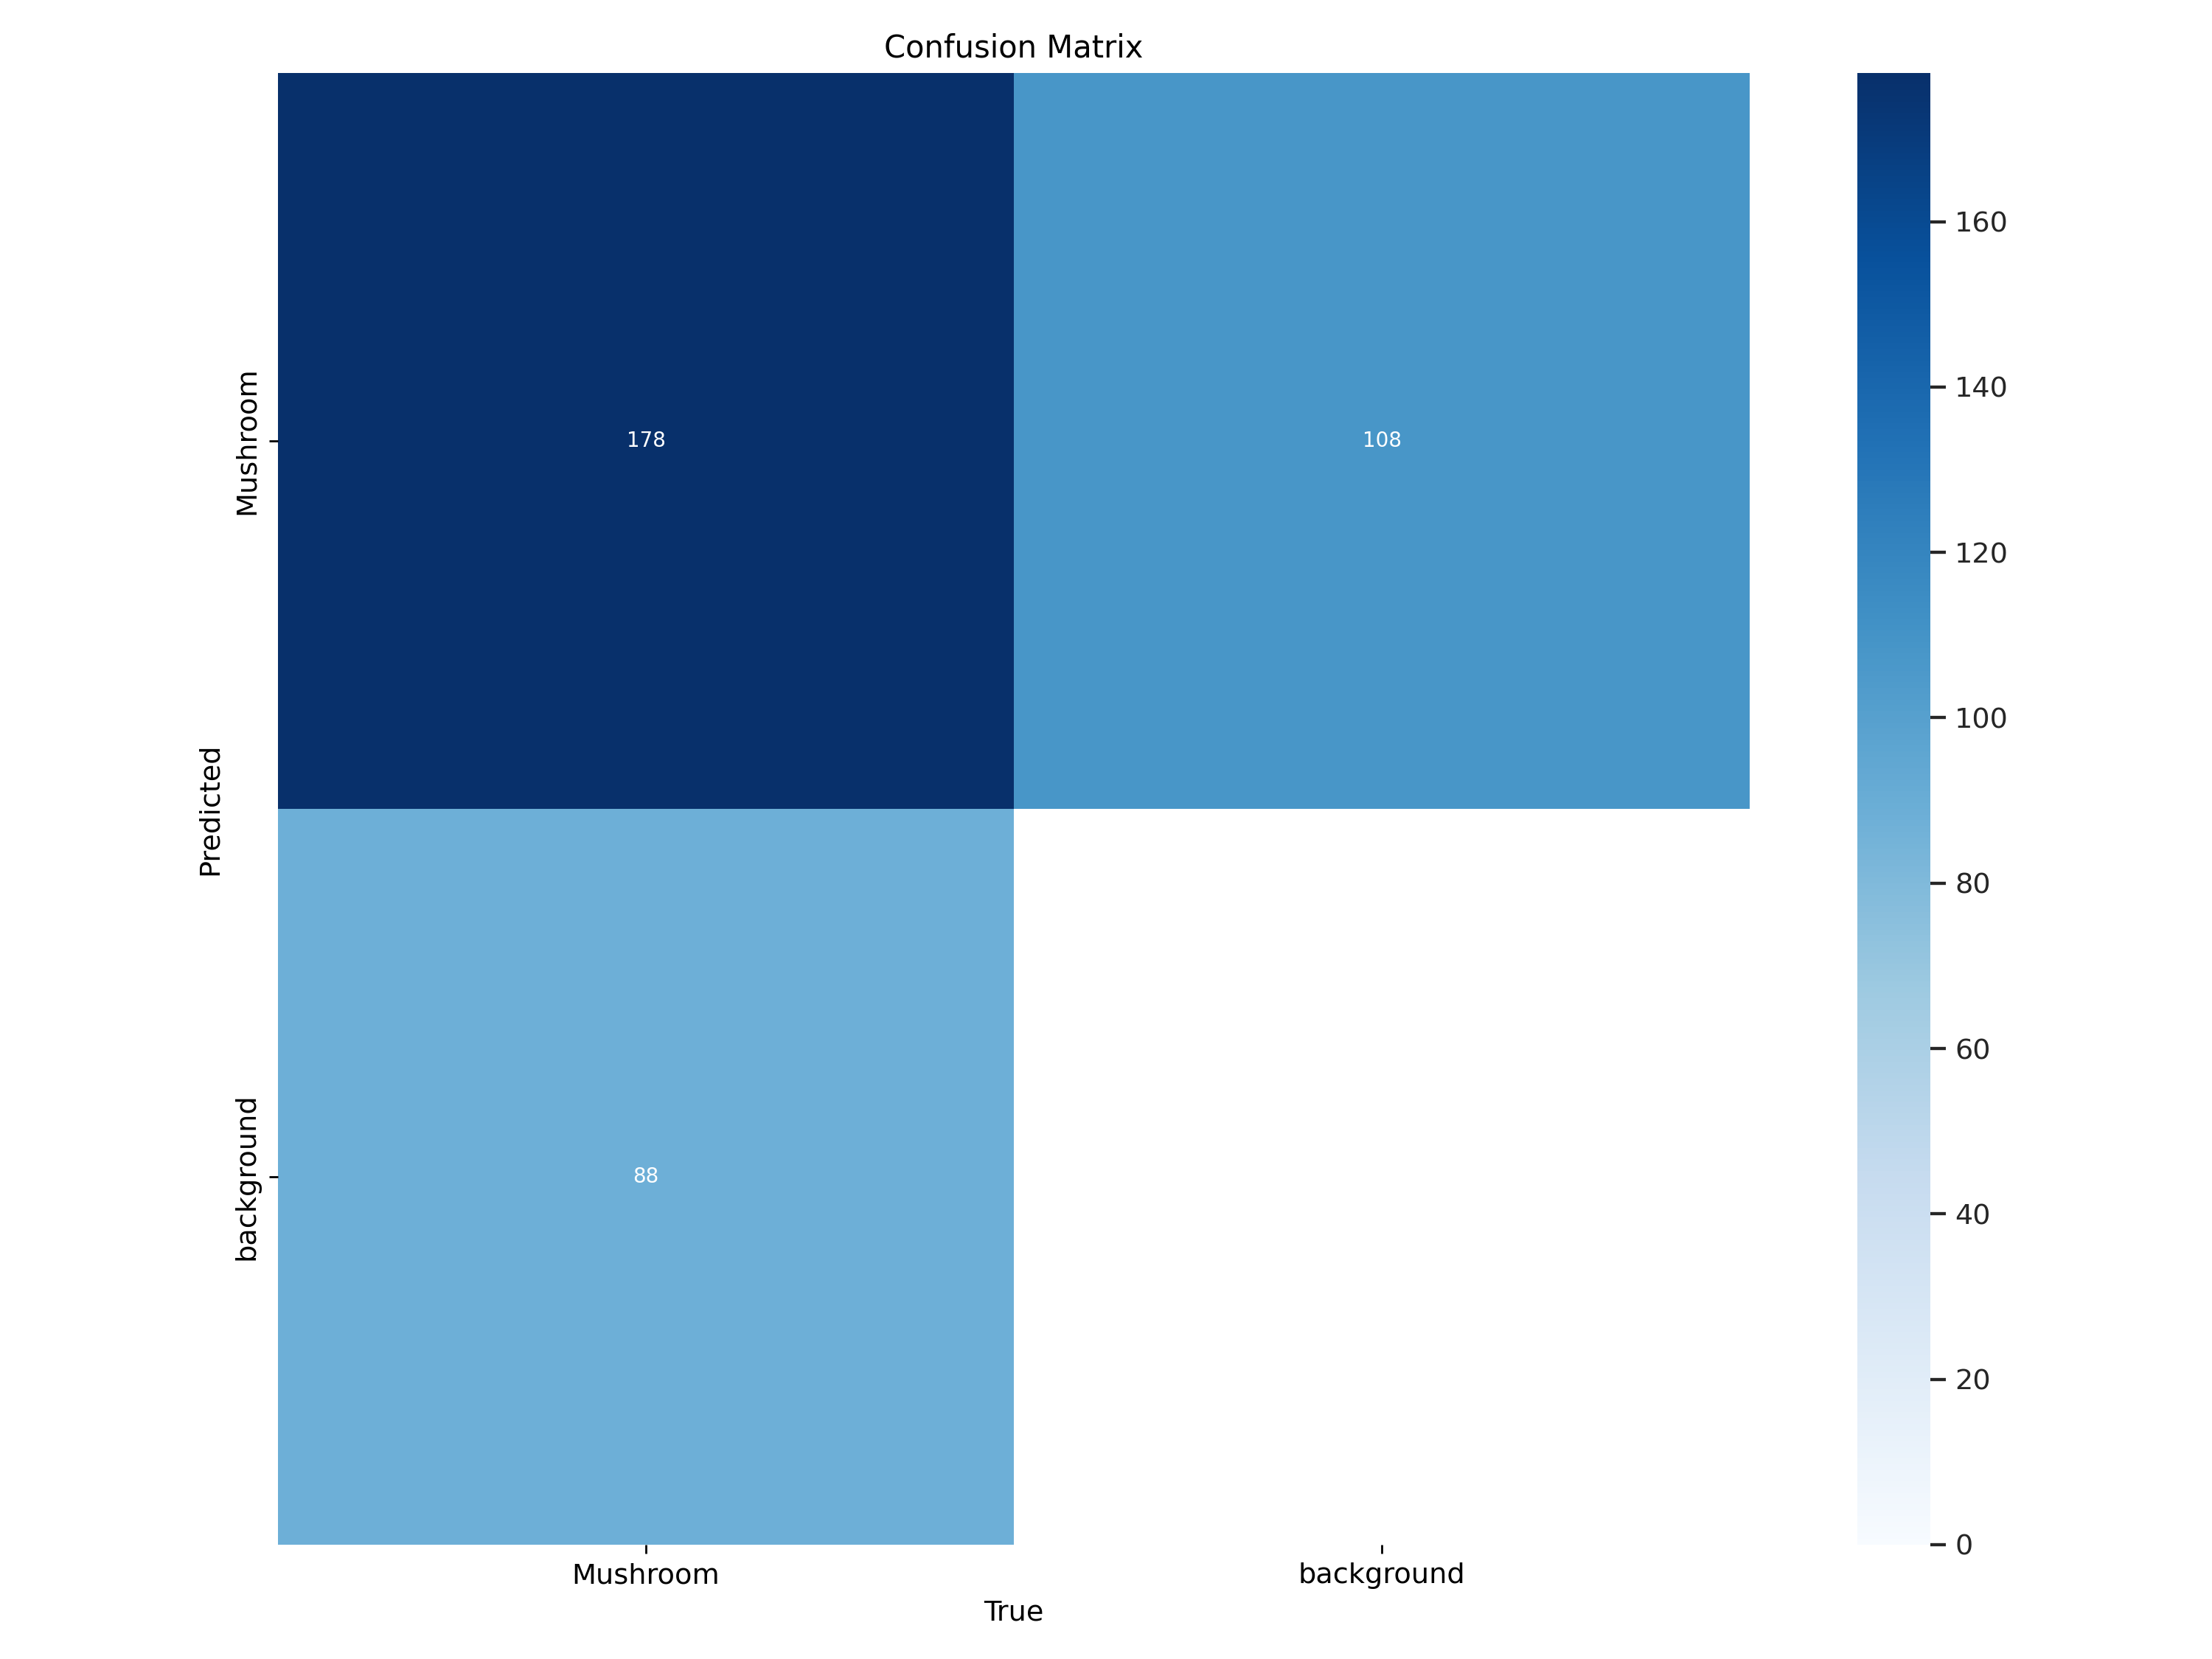

In [14]:
Image(filename=f'/content/runs/detect/train2/confusion_matrix.png', width=800)

## Metrics Evaluation

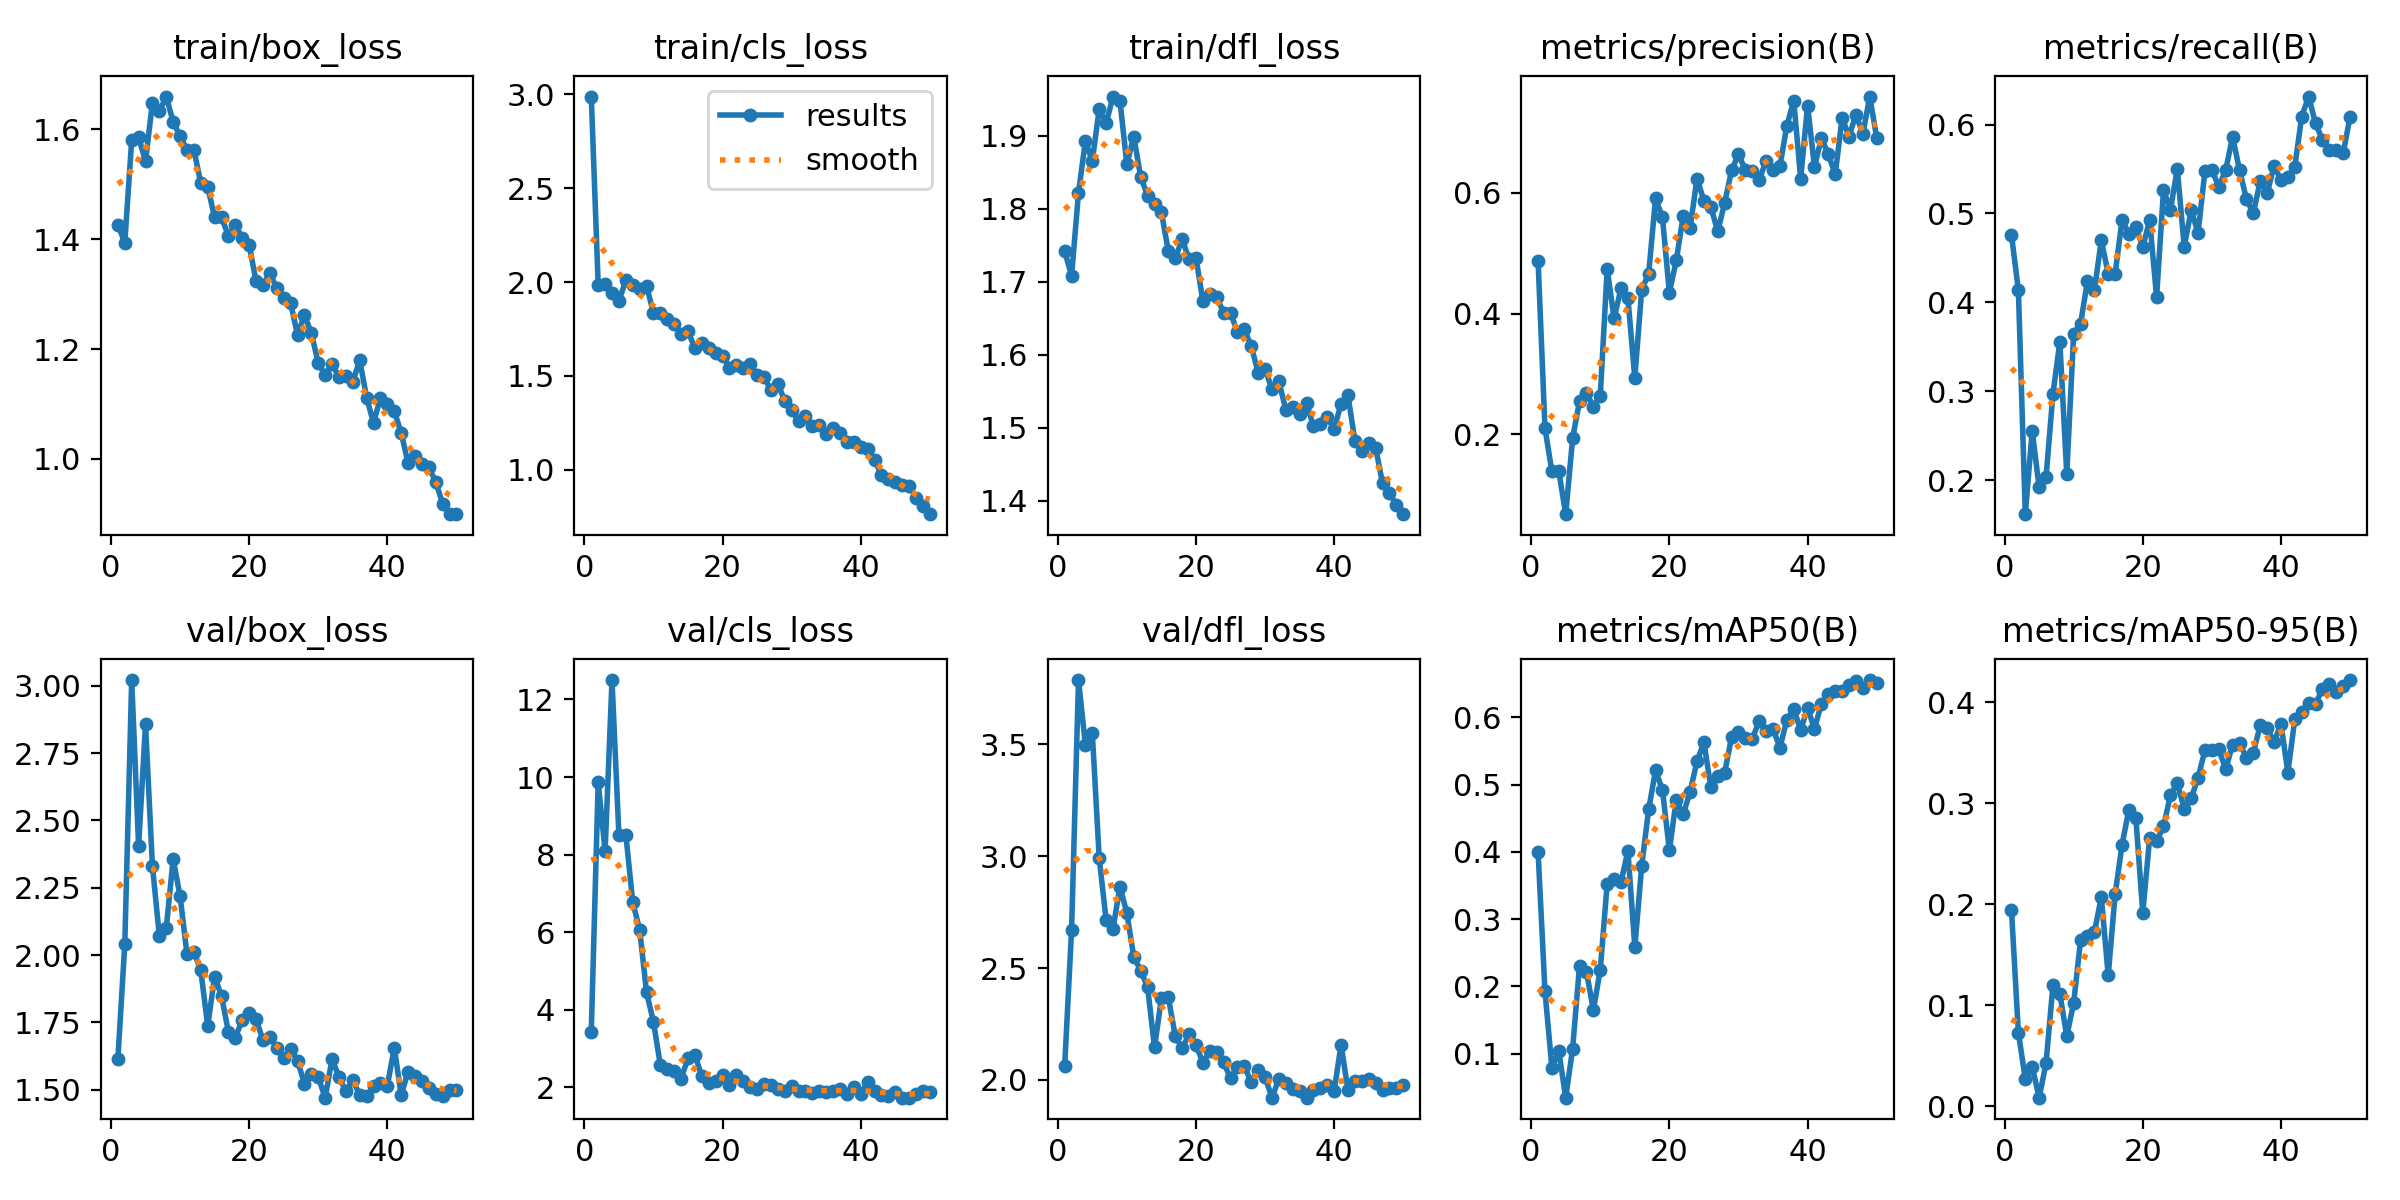

In [16]:
Image(filename=f'/content/runs/detect/train2/results.png', width=800)

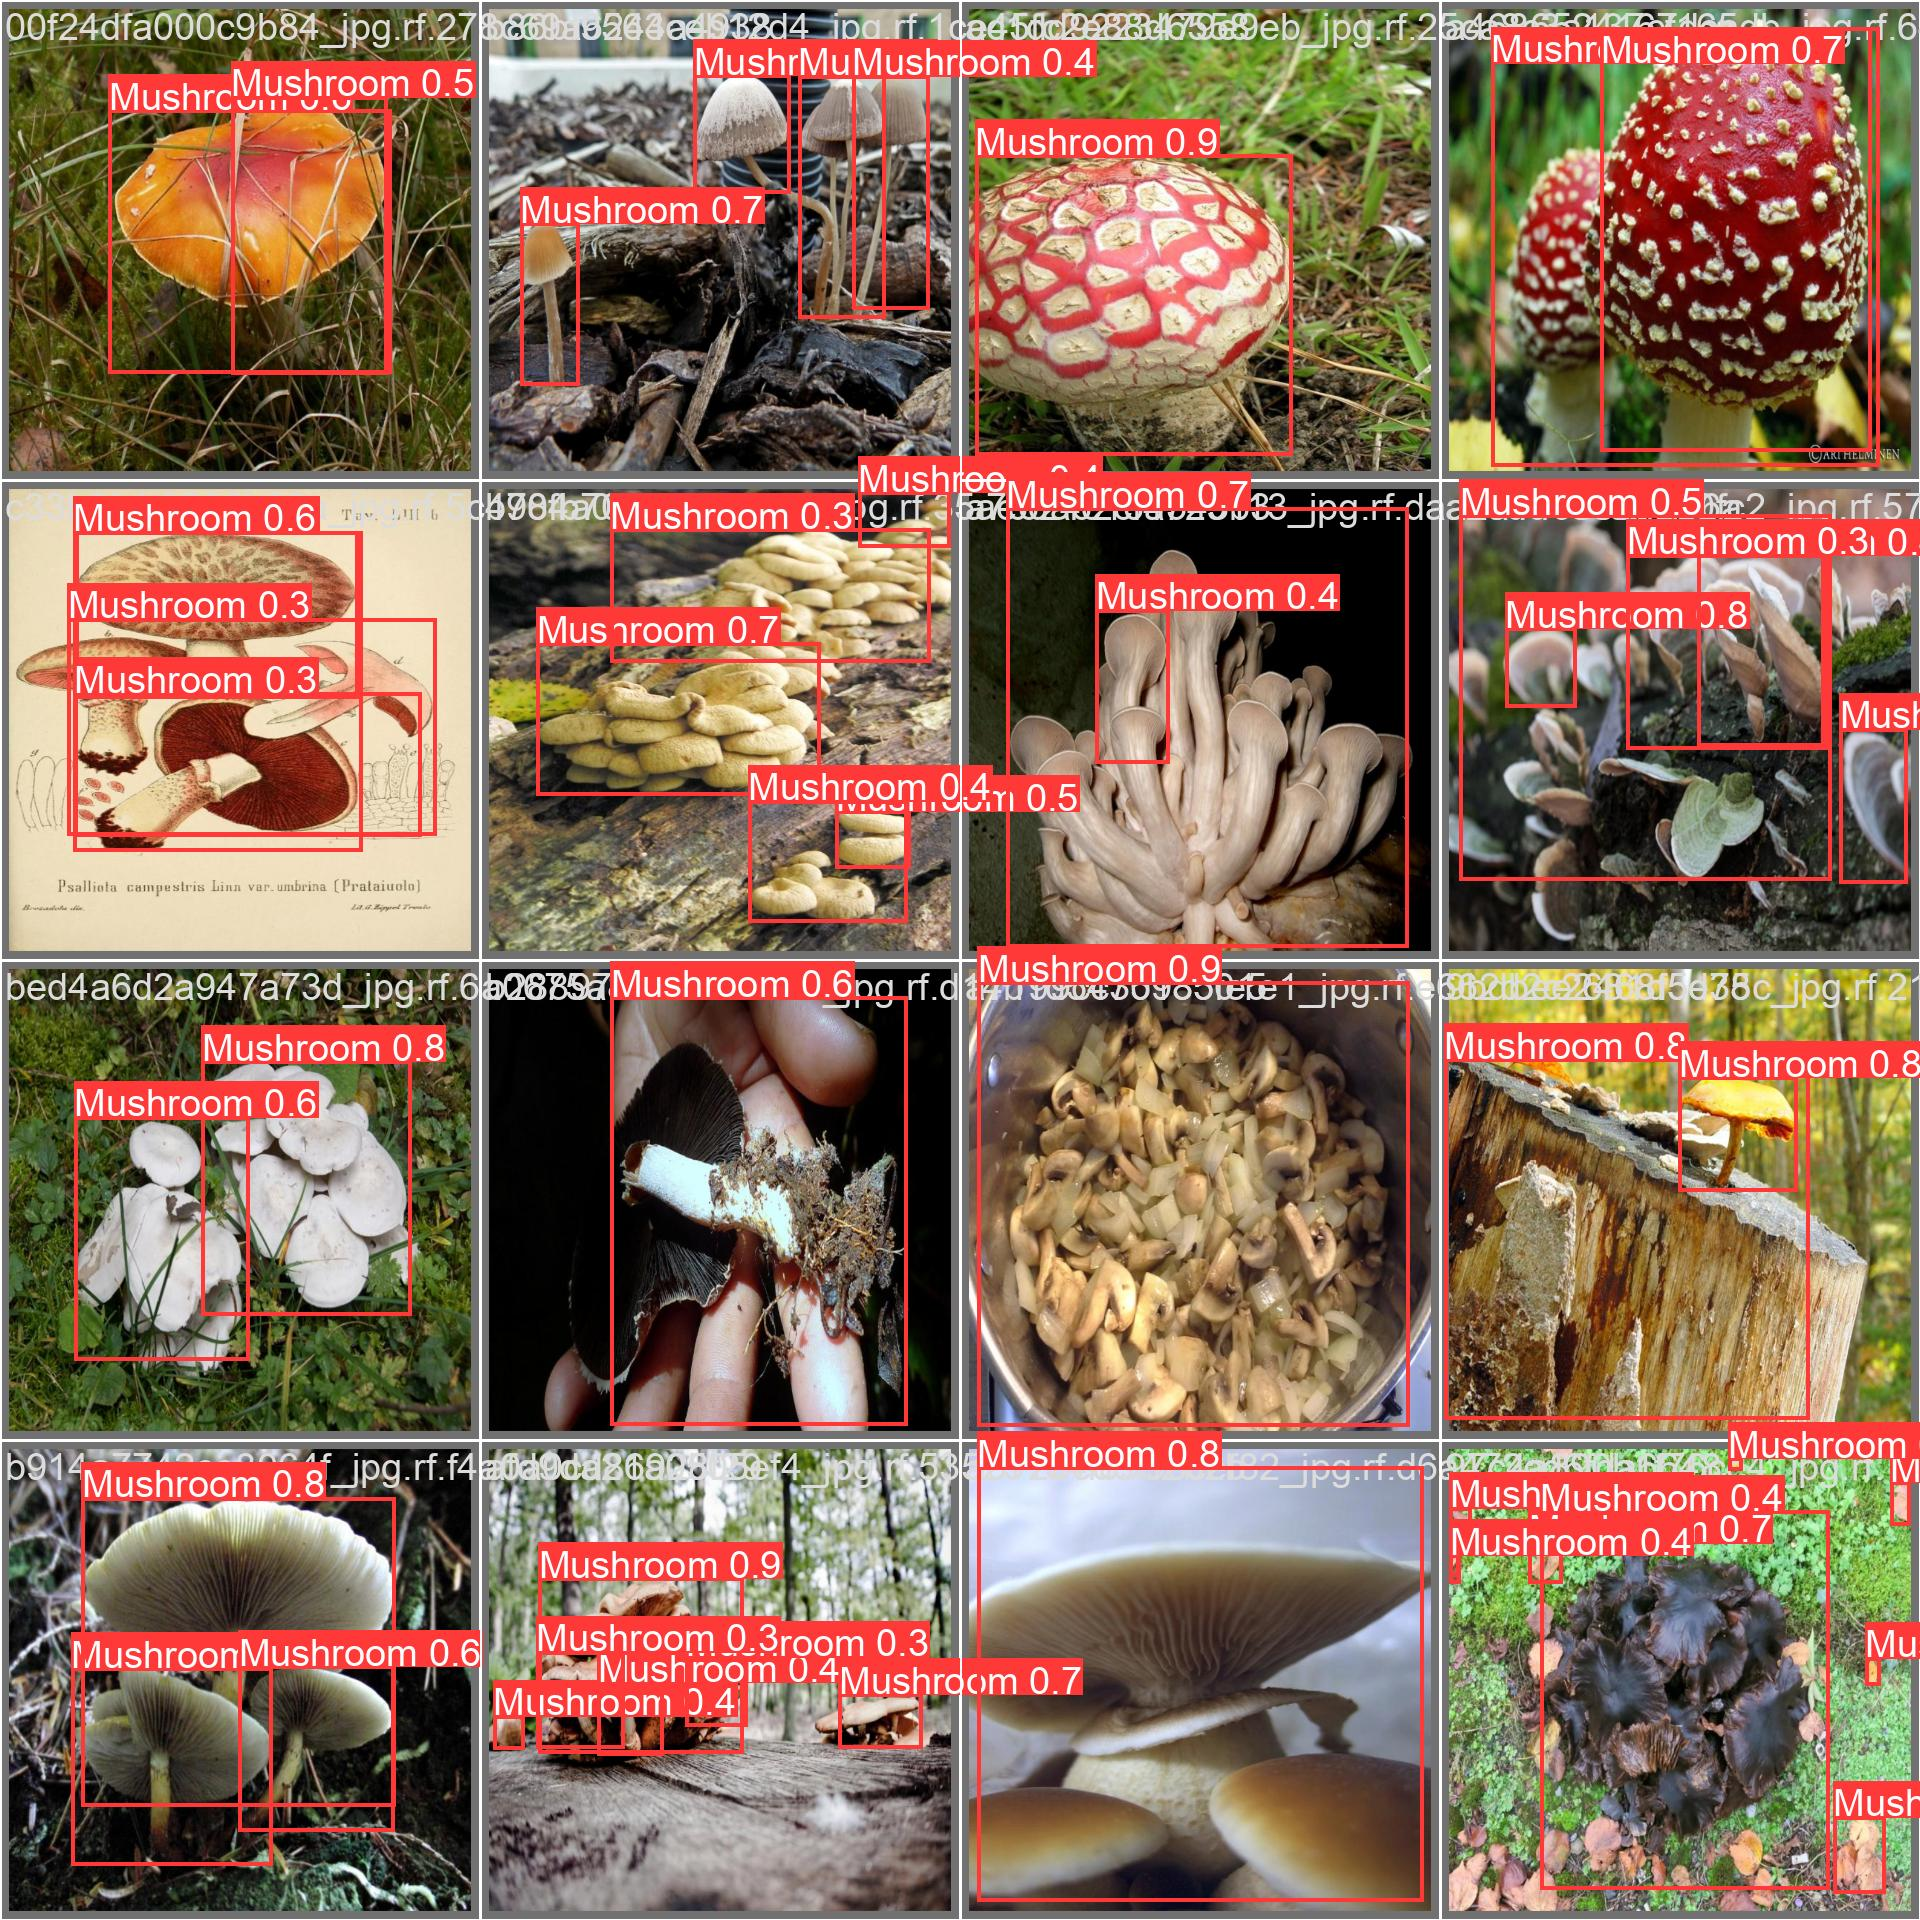

In [17]:
Image(filename=f'/content/runs/detect/train2/val_batch0_pred.jpg', width=800)

## **Validate Custom Model**

In [19]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data=/content/Dataset/mushroomDetection-1/data.yaml

Ultralytics YOLOv8.0.234 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Dataset/mushroomDetection-1/valid/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100% 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0% 0/7 [00:00<?, ?it/s]WARNING ⚠️ NMS time limit 1.300s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:06<00:00,  1.03it/s]
                   all        100        266      0.699      0.545       0.58      0.386
Speed: 5.1ms preprocess, 17.2ms inference, 0.0ms loss, 16.2ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


## **Prediction**

In [20]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source=/content/Dataset/mushroomDetection-1/test/images save=True

Ultralytics YOLOv8.0.234 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/50 /content/Dataset/mushroomDetection-1/test/images/0008f6b6eb34b0fe_jpg.rf.47779d81c1d24bc3194c50746594108e.jpg: 800x800 2 Mushrooms, 22.5ms
image 2/50 /content/Dataset/mushroomDetection-1/test/images/01d7313401325f02_jpg.rf.127222f49f88979a881919567bbd6f0d.jpg: 800x800 1 Mushroom, 22.5ms
image 3/50 /content/Dataset/mushroomDetection-1/test/images/02aa2e5a78409096_jpg.rf.a12bf20b138a89bcbae0760940bb1b35.jpg: 800x800 10 Mushrooms, 22.4ms
image 4/50 /content/Dataset/mushroomDetection-1/test/images/02fc28a3915dc3af_jpg.rf.7f7626e62da08914e3489899b940a48e.jpg: 800x800 1 Mushroom, 22.4ms
image 5/50 /content/Dataset/mushroomDetection-1/test/images/0470916cc5df8d50_jpg.rf.e158dd6225d6a0ca5353f2b9e4ad8626.jpg: 800x800 7 Mushrooms, 22.4ms
image 6/50 /content/Dataset/mushroomDet

Lets look at some results:

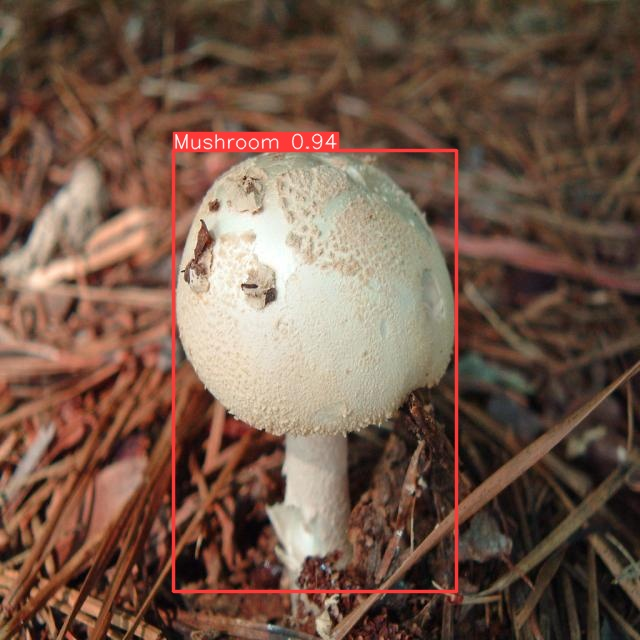

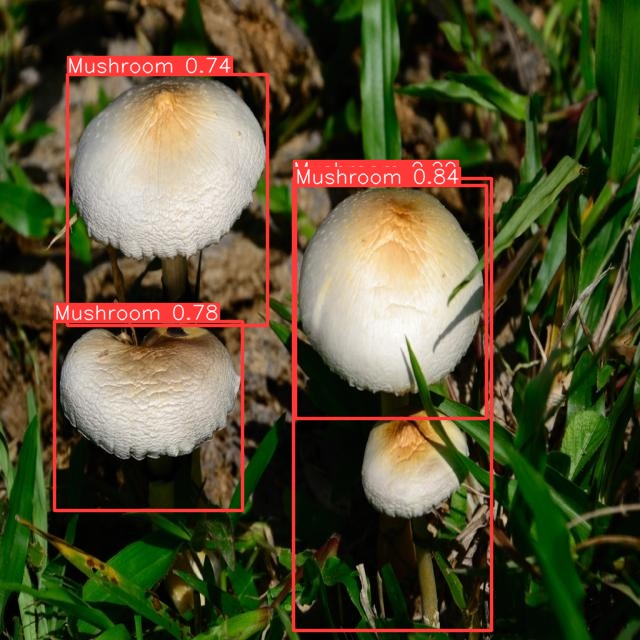

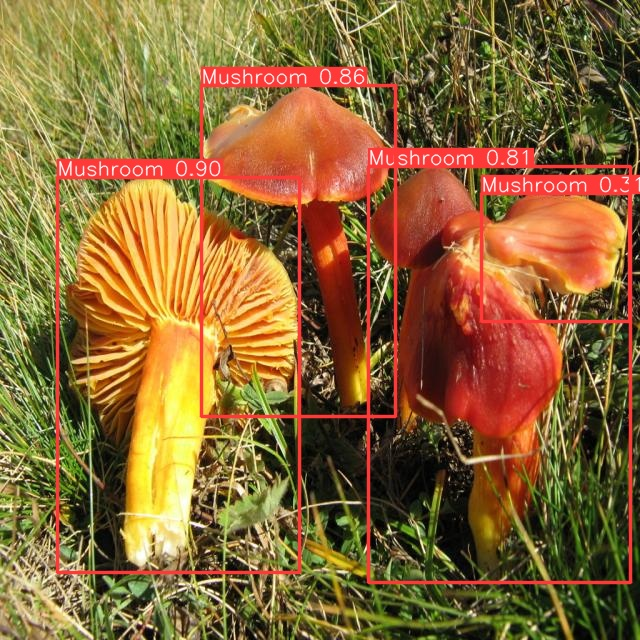

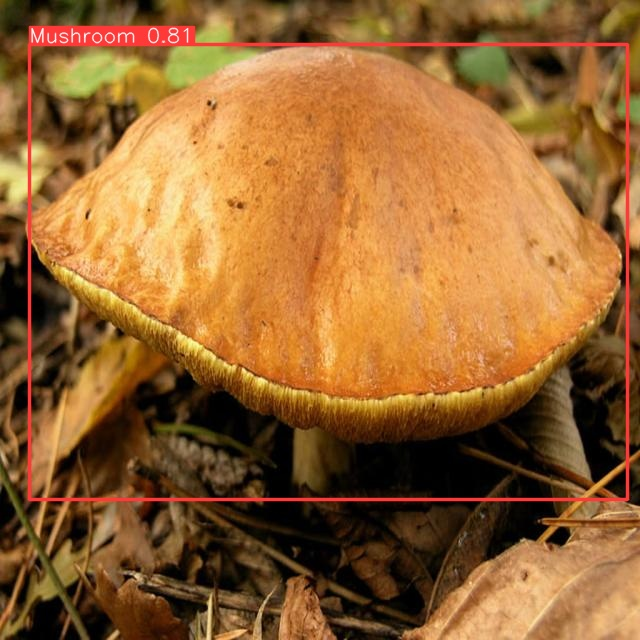

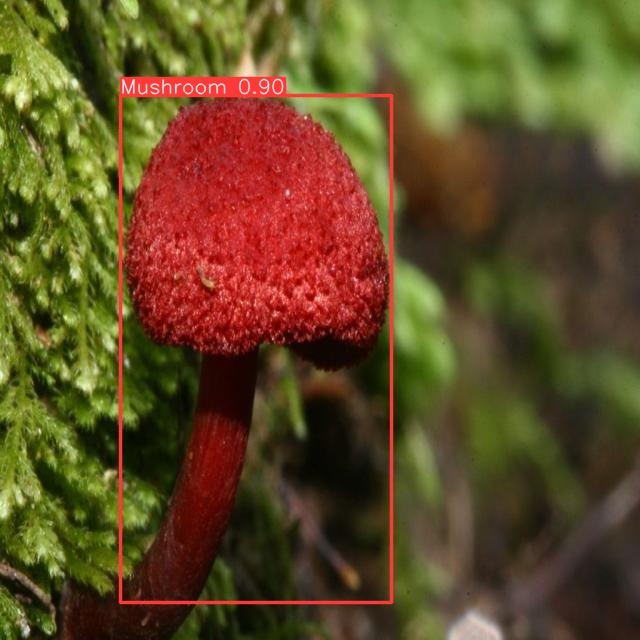

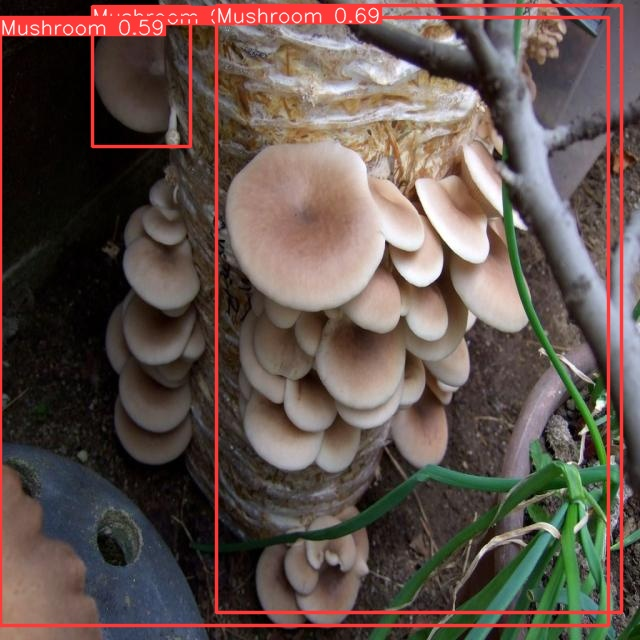

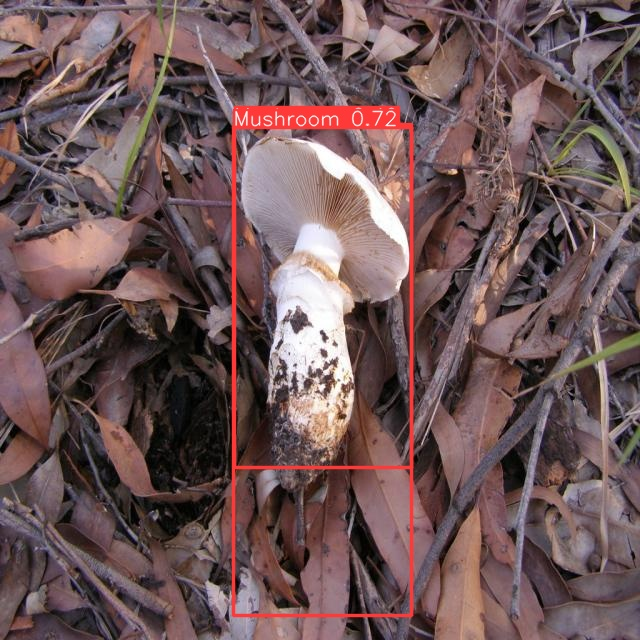

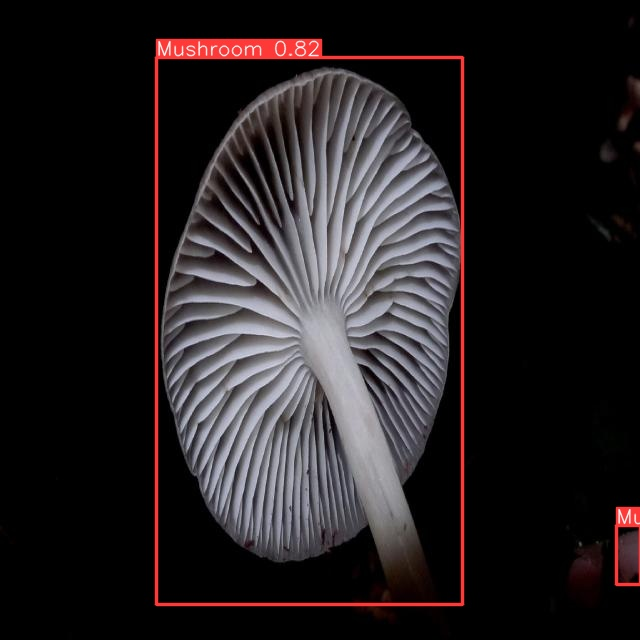

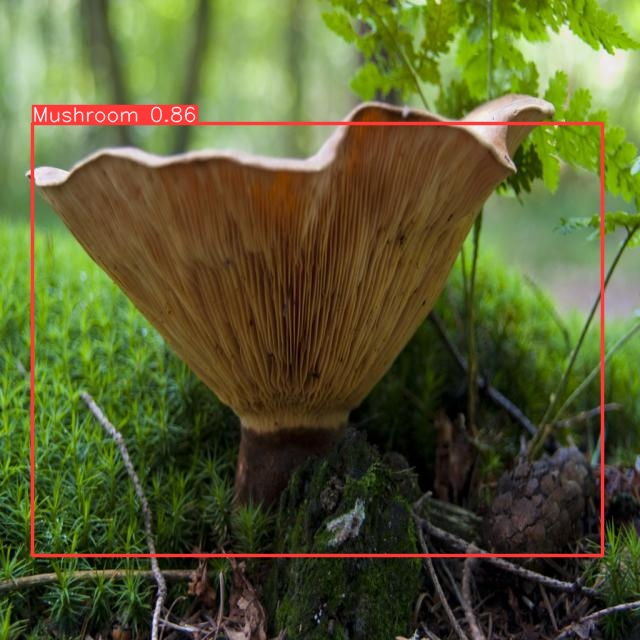

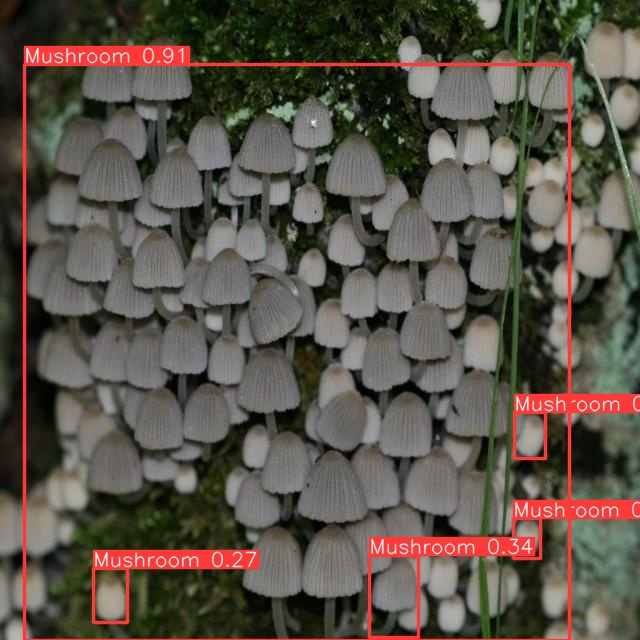

In [21]:
import glob

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")